In [32]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import statsmodels.api                      as     sm
import scipy.stats                          as     stats
from   sklearn                              import datasets
from   sklearn.metrics                      import mean_squared_error
from   sklearn.preprocessing                import PolynomialFeatures
from   sklearn.linear_model                 import LinearRegression
from   sklearn                              import linear_model
from   sklearn.model_selection  import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from imblearn.metrics import specificity_score
from sklearn.metrics import f1_score 
from sklearn import metrics
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from pylab import rcParams
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, log_loss
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [7]:
df = pd.read_csv('SouvenirSales.csv', parse_dates=['Date'])
print(df.head())

     Date    Sales
0  Jan-95  1664.81
1  Feb-95  2397.53
2  Mar-95  2840.71
3  Apr-95  3547.29
4  May-95  3752.96


In [10]:
dates=pd.date_range(start='1/1/1995',freq='MS',periods=len(df))
print(dates)

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01', '1995-11-01', '1995-12-01',
               '1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
      

In [14]:
import calendar
df['Month']=dates.month
df.head()

,Date,Sales,Month
0,Jan-95,1664.81,1
1,Feb-95,2397.53,2
2,Mar-95,2840.71,3
3,Apr-95,3547.29,4
4,May-95,3752.96,5


In [15]:
df['Month']=df['Month'].apply(lambda x: calendar.month_abbr[x])
df['Month'].head()

0    Jan
1    Feb
2    Mar
3    Apr
4    May
Name: Month, dtype: object

In [16]:
df['Year']=dates.year
df['Year'].head()

0    1995
1    1995
2    1995
3    1995
4    1995
Name: Year, dtype: int64

In [17]:
df.head()

,Date,Sales,Month,Year
0,Jan-95,1664.81,Jan,1995
1,Feb-95,2397.53,Feb,1995
2,Mar-95,2840.71,Mar,1995
3,Apr-95,3547.29,Apr,1995
4,May-95,3752.96,May,1995


In [18]:
df.index=dates
df=df[['Sales']]
df.head()

,Sales
1995-01-01,1664.81
1995-02-01,2397.53
1995-03-01,2840.71
1995-04-01,3547.29
1995-05-01,3752.96


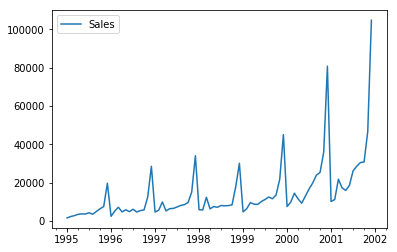

In [20]:
df.plot()
plt.show()

In [22]:
#Creating train and test set 
train=df[0:int(len(df)*0.7)] 
test=df[int(len(df)*0.7):]

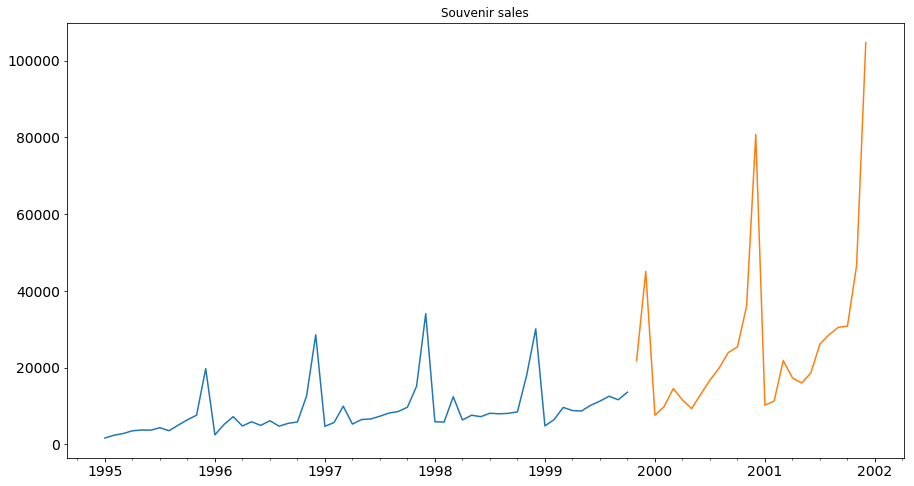

In [23]:
train.Sales.plot(figsize=(15,8), title= 'Souvenir sales', fontsize=14)
test.Sales.plot(figsize=(15,8), title= 'Souvenir sales', fontsize=14)
plt.show()

# Model 1

In [24]:
time=[i+1 for i in range (len(df))]

In [25]:
df1=df.copy()
df1['time'] = time
df1.head()

,Sales,time
1995-01-01,1664.81,1
1995-02-01,2397.53,2
1995-03-01,2840.71,3
1995-04-01,3547.29,4
1995-05-01,3752.96,5


In [26]:
#Creating train and test set 
train=df1[0:int(len(df1)*0.7)] 
test=df1[int(len(df1)*0.7):]

In [27]:
x_train = train.drop('Sales', axis=1)
x_test = test.drop('Sales', axis=1)
y_train = train[['Sales']]
y_test = test[['Sales']]

In [36]:
model = LinearRegression()

In [37]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [38]:
predictions = model.predict(x_test)

In [39]:
y_test['RegOnTime'] = predictions

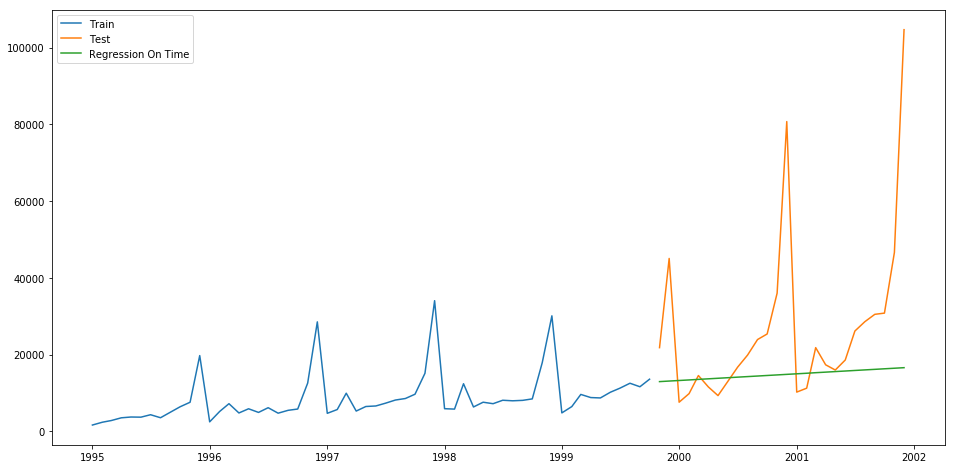

In [41]:
plt.figure(figsize=(16,8))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_test['RegOnTime'], label='Regression On Time')
plt.legend(loc='best')

In [43]:
rmse = np.sqrt(mean_squared_error(test.Sales, y_test.RegOnTime))
rmse = round(rmse, 3)
rmse

24527.31

In [44]:
abs_error = np.abs(y_test['Sales']-y_test['RegOnTime'])
actual = y_test['Sales']
mape = np.round(np.mean(abs_error/actual),3)
mape

0.398

In [45]:
resultsDf = pd.DataFrame({'Method':['RegressionOnTime'], 'rmse': [rmse]})
resultsDf

resultsDf = pd.DataFrame({'Method':['RegressionOnTime'], 'MAPE': [mape], 'rmse': [rmse]})
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

,Method,rmse,MAPE
0,RegressionOnTime,24527.31,0.398


# Model 2

In [46]:
time = [i+1 for i in range(len(df))]
df1 = df.copy()
df1['time'] = time

In [47]:
monthSeasonality = ['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']

In [49]:
df1['monthSeasonality'] = monthSeasonality*7
df1.head(12)

,Sales,time,monthSeasonality
1995-01-01,1664.81,1,m1
1995-02-01,2397.53,2,m2
1995-03-01,2840.71,3,m3
1995-04-01,3547.29,4,m4
1995-05-01,3752.96,5,m5
1995-06-01,3714.74,6,m6
1995-07-01,4349.61,7,m7
1995-08-01,3566.34,8,m8
1995-09-01,5021.82,9,m9
1995-10-01,6423.48,10,m10


In [50]:
df1Complete = pd.get_dummies(df1, drop_first=True)
df1Complete.head(4).T

,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00
Sales,1664.81,2397.53,2840.71,3547.29
time,1.00,2.00,3.00,4.00
monthSeasonality_m10,0.00,0.00,0.00,0.00
monthSeasonality_m11,0.00,0.00,0.00,0.00
monthSeasonality_m12,0.00,0.00,0.00,0.00
monthSeasonality_m2,0.00,1.00,0.00,0.00
monthSeasonality_m3,0.00,0.00,1.00,0.00
monthSeasonality_m4,0.00,0.00,0.00,1.00
monthSeasonality_m5,0.00,0.00,0.00,0.00
monthSeasonality_m6,0.00,0.00,0.00,0.00


In [51]:
#Creating train and test set 
train=df1Complete[0:int(len(df1Complete)*0.7)] 
test=df1Complete[int(len(df1Complete)*0.7):]

In [52]:
x_train = train.drop('Sales', axis=1)
x_test = test.drop('Sales', axis=1)
y_train = train[['Sales']]
y_test = test[['Sales']]

In [53]:
model = LinearRegression()

In [54]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [55]:
predictions = model.predict(x_test)

In [56]:
y_test['RegOnTimeSeasonal'] = predictions

C:\Users\Sidharrth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


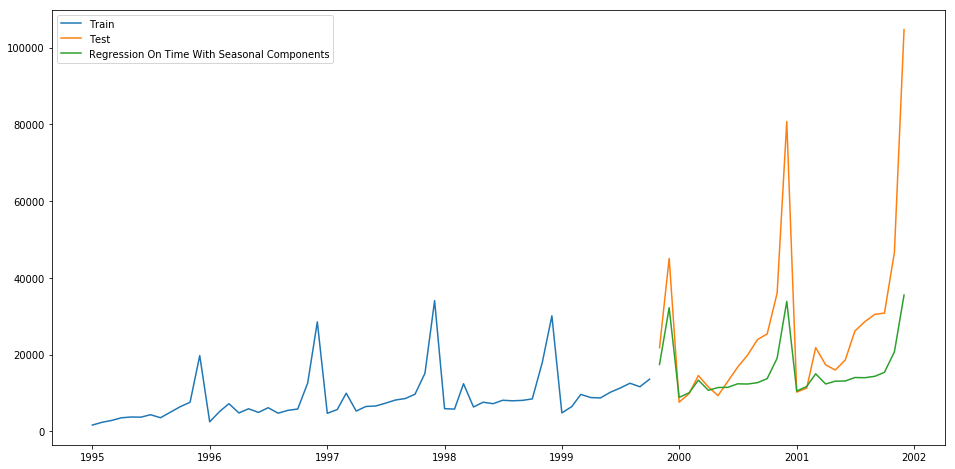

In [58]:
plt.figure(figsize=(16,8))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_test['RegOnTimeSeasonal'], label='Regression On Time With Seasonal Components')
plt.legend(loc='best')

In [59]:
rmse = sqrt(mean_squared_error(test.Sales, y_test.RegOnTimeSeasonal))
rmse = round(rmse, 3)
rmse

19045.756

In [60]:
abs_error = np.abs(y_test['Sales']-y_test['RegOnTimeSeasonal'])
actual = y_test['Sales']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.3136

In [61]:
tempResultsDf = pd.DataFrame({'Method':['RegressionOnTimeSeasonal'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

,Method,rmse,MAPE
0,RegressionOnTime,24527.310,0.3980
0,RegressionOnTimeSeasonal,19045.756,0.3136


# Model 3

In [63]:
dd= np.asarray(train.Sales)

In [64]:
dd

array([ 1664.81,  2397.53,  2840.71,  3547.29,  3752.96,  3714.74,
        4349.61,  3566.34,  5021.82,  6423.48,  7600.6 , 19756.21,
        2499.81,  5198.24,  7225.14,  4806.03,  5900.88,  4951.34,
        6179.12,  4752.15,  5496.43,  5835.1 , 12600.08, 28541.72,
        4717.02,  5702.63,  9957.58,  5304.78,  6492.43,  6630.8 ,
        7349.62,  8176.62,  8573.17,  9690.5 , 15151.84, 34061.01,
        5921.1 ,  5814.58, 12421.25,  6369.77,  7609.12,  7224.75,
        8121.22,  7979.25,  8093.06,  8476.7 , 17914.66, 30114.41,
        4826.64,  6470.23,  9638.77,  8821.17,  8722.37, 10209.48,
       11276.55, 12552.22, 11637.39, 13606.89])

In [65]:
y_hat = test.copy()

In [67]:
#y_hat['naive'] = dd[len(dd)-1]

for i in range(len(y_hat)):
    if i == 0:
        y_hat['naive'] = np.nan
    else:
        y_hat['naive'][i] = y_hat.Sales[i-1]


C:\Users\Sidharrth\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Text(0.5, 1.0, 'Naive Forecast')

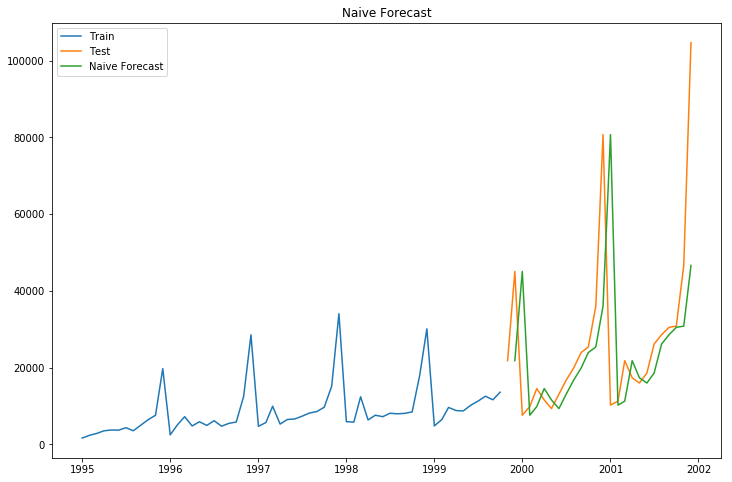

In [68]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Sales'], label='Train')
plt.plot(test.index,test['Sales'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")

In [72]:
#RMSE Calculation
rmse = np.sqrt(mean_squared_error(test.Sales[1:len(test.Sales)], y_hat.naive[1:len(test.Sales)]))
rmse = round(rmse, 3)
rmse

22752.789

In [73]:
abs_error = np.abs(y_test['Sales']-y_hat.naive)
actual = y_test['Sales']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.6999

In [74]:
tempResultsDf = pd.DataFrame({'Method':['Naive forecast'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

,Method,rmse,MAPE
0,RegressionOnTime,24527.310,0.3980
0,RegressionOnTimeSeasonal,19045.756,0.3136
0,Naive forecast,22752.789,0.6999


# Model 4

In [75]:
y_hat_avg = test.copy()

In [77]:
y_hat_avg['avg_forecast'] = train['Sales'].mean()

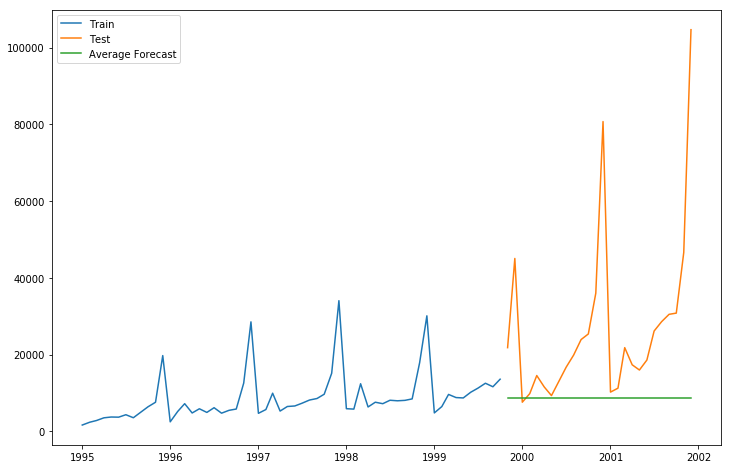

In [78]:
plt.figure(figsize=(12,8))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')

In [79]:
rmse = sqrt(mean_squared_error(test.Sales, y_hat_avg.avg_forecast))
rmse = round(rmse, 3)
rmse

28364.958

In [80]:
abs_error = np.abs(y_test['Sales']-y_hat_avg.avg_forecast)
actual = y_test['Sales']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.5273

In [81]:
tempResultsDf = pd.DataFrame({'Method':['Simple average forecast'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

,Method,rmse,MAPE
0,RegressionOnTime,24527.310,0.3980
0,RegressionOnTimeSeasonal,19045.756,0.3136
0,Naive forecast,22752.789,0.6999
0,Simple average forecast,28364.958,0.5273


# Model 5

In [95]:
df1 = df.copy()

In [103]:
df1['moving_avg_forecast'] = df['Sales'].rolling(30).mean()

In [104]:
df1.head(3)

,Sales,moving_avg_forecast
1995-01-01,1664.81,NaN
1995-02-01,2397.53,NaN
1995-03-01,2840.71,NaN


In [105]:
df1.tail(3)

,Sales,moving_avg_forecast
2001-10-01,30821.33,20498.915000
2001-11-01,46634.38,21762.648667
2001-12-01,104660.67,24911.021667


In [112]:
#Creating train and test set 
train=df1[0:int(len(df1)*0.7)] 
test=df1[int(len(df1)*0.7):]

In [114]:
y_hat_avg = test.copy()

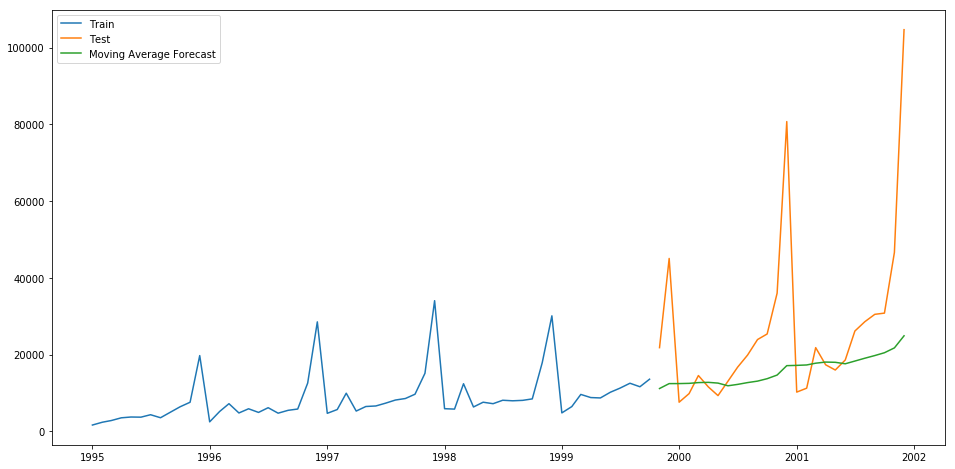

In [115]:
plt.figure(figsize=(16,8))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')

In [116]:
y_hat_avg.moving_avg_forecast

1999-11-01    11175.908333
1999-12-01    12456.904667
2000-01-01    12465.751667
2000-02-01    12521.520667
2000-03-01    12721.028333
2000-04-01    12784.256000
2000-05-01    12590.280000
2000-06-01    11890.982667
2000-07-01    12251.372000
2000-08-01    12720.506333
2000-09-01    13104.244000
2000-10-01    13738.296667
2000-11-01    14685.486000
2000-12-01    17135.384667
2001-01-01    17206.118667
2001-02-01    17315.706333
2001-03-01    17773.499000
2001-04-01    18069.520000
2001-05-01    18005.624333
2001-06-01    17621.861667
2001-07-01    18332.812000
2001-08-01    19070.021667
2001-09-01    19765.576333
2001-10-01    20498.915000
2001-11-01    21762.648667
2001-12-01    24911.021667
Freq: MS, Name: moving_avg_forecast, dtype: float64

In [117]:
rmse = sqrt(mean_squared_error(test.Sales, y_hat_avg.moving_avg_forecast))
rmse = round(rmse, 3)
rmse

22791.892

In [118]:
abs_error = np.abs(y_test['Sales']-y_hat_avg.moving_avg_forecast)
actual = y_test['Sales']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.3825

In [119]:
tempResultsDf = pd.DataFrame({'Method':['Moving average forecast'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

,Method,rmse,MAPE
0,RegressionOnTime,24527.310,0.3980
0,RegressionOnTimeSeasonal,19045.756,0.3136
0,Naive forecast,22752.789,0.6999
0,Simple average forecast,28364.958,0.5273
0,Moving average forecast,22791.892,0.3825


# Model 6

In [120]:
# create class
model = SimpleExpSmoothing(train['Sales'])

In [121]:
# fit model
model_fit = model.fit(smoothing_level=0.8,optimized=False)
model_fit.params

{'smoothing_level': 0.8,
 'smoothing_slope': None,
 'smoothing_seasonal': None,
 'damping_slope': nan,
 'initial_level': 1664.81,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [122]:
y_hat_avg = test.copy()

In [124]:
y_hat_avg['SES'] = model_fit.forecast(len(test['Sales']))

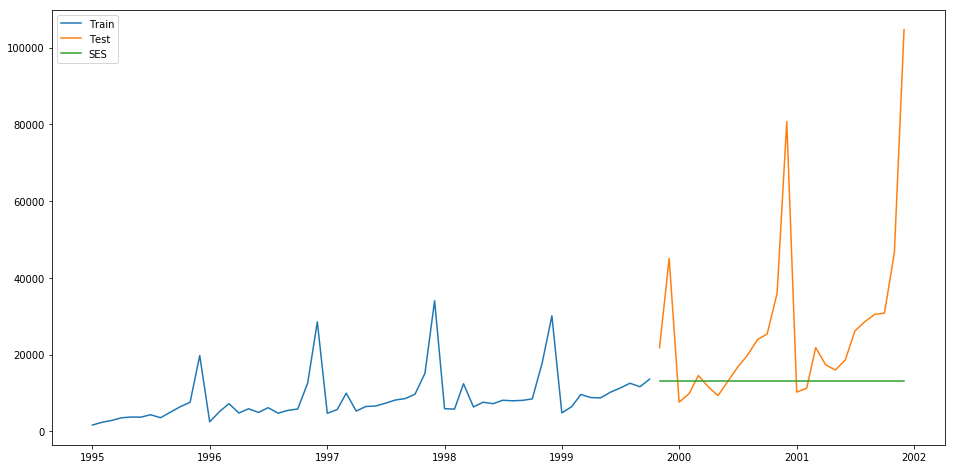

In [125]:
plt.figure(figsize=(16,8))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')

In [128]:
rmse = sqrt(mean_squared_error(test.Sales, y_hat_avg.SES))
rmse = round(rmse, 3)
rmse

25694.036

In [127]:
abs_error = np.abs(y_test['Sales']-y_hat_avg.SES)
actual = y_test['Sales']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.4269

In [129]:
tempResultsDf = pd.DataFrame({'Method':['SES forecast'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

,Method,rmse,MAPE
0,RegressionOnTime,24527.310,0.3980
0,RegressionOnTimeSeasonal,19045.756,0.3136
0,Naive forecast,22752.789,0.6999
0,Simple average forecast,28364.958,0.5273
0,Moving average forecast,22791.892,0.3825
0,SES forecast,25694.036,0.4269


In [132]:
alpha=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for i in alpha:
    model_fit = model.fit(smoothing_level=i,optimized=False)
    ap_ES = test.copy()
    ap_ES['SES'] = model_fit.forecast(len(test['Sales']))
    rmse = np.sqrt(mean_squared_error(test.Sales, ap_ES.SES))
    rmse = round(rmse, 3)
    print('The RMSE Value for i',i,'is : ',rmse)

The RMSE Value for i 0.1 is :  26953.005
The RMSE Value for i 0.2 is :  26644.667
The RMSE Value for i 0.3 is :  26425.137
The RMSE Value for i 0.4 is :  26219.327
The RMSE Value for i 0.5 is :  26044.535
The RMSE Value for i 0.6 is :  25905.412
The RMSE Value for i 0.7 is :  25792.782
The RMSE Value for i 0.8 is :  25694.036
The RMSE Value for i 0.9 is :  25598.828
The RMSE Value for i 1.0 is :  25500.015


# Model 7

In [134]:
fit1 = ExponentialSmoothing(np.asarray(train['Sales']) ,trend='add', seasonal='None').fit()
fit1.params

{'smoothing_level': 0.1052631578947132,
 'smoothing_slope': 0.10526315789473684,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 1664.810000002613,
 'initial_slope': 732.7199999998357,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [135]:
y_hat_avg['Holt'] = fit1.forecast(len(test))

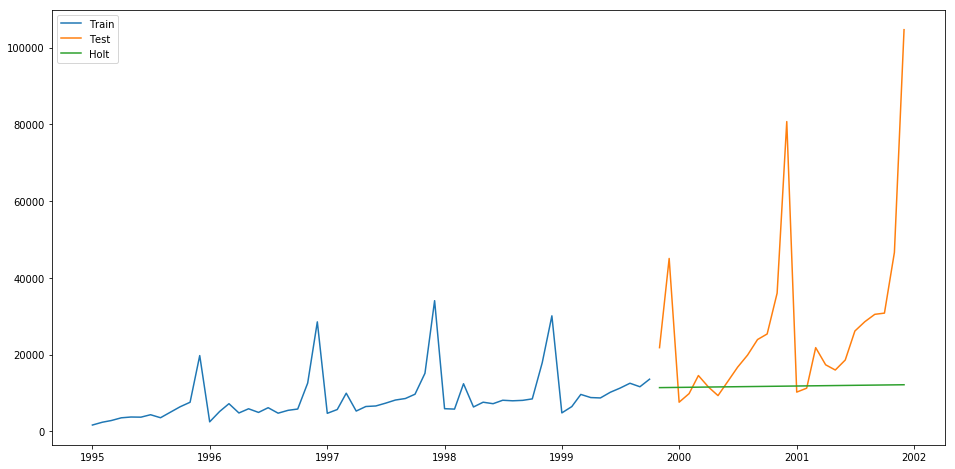

In [136]:
plt.figure(figsize=(16,8))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_avg['Holt'], label='Holt')
plt.legend(loc='best')

In [137]:
rmse = sqrt(mean_squared_error(test.Sales, y_hat_avg.Holt))
rmse = round(rmse, 3)
rmse

26415.706

In [138]:
abs_error = np.abs(y_test['Sales']-y_hat_avg.Holt)
actual = y_test['Sales']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.4343

In [139]:
tempResultsDf = pd.DataFrame({'Method':['Holt'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

,Method,rmse,MAPE
0,RegressionOnTime,24527.310,0.3980
0,RegressionOnTimeSeasonal,19045.756,0.3136
0,Naive forecast,22752.789,0.6999
0,Simple average forecast,28364.958,0.5273
0,Moving average forecast,22791.892,0.3825
0,SES forecast,25694.036,0.4269
0,Holt,26415.706,0.4343


# Model 8

In [140]:
y_hat_avg = test.copy()

In [141]:
fit1 = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add').fit()
fit1.params

{'smoothing_level': 0.2631578922490915,
 'smoothing_slope': 0.03857189302178059,
 'smoothing_seasonal': 0.7368421027754073,
 'damping_slope': nan,
 'initial_level': 3150.453696790052,
 'initial_slope': 149.37202896970877,
 'initial_seasons': array([-2064.42399908, -1104.80938264,  -803.33900273,  -732.06392877,
         -424.49038174,  -569.39065754,   113.24663013,  -747.2471516 ,
          713.00957716,  2365.44783744,  4161.95033426, 15817.59605662]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [142]:
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))

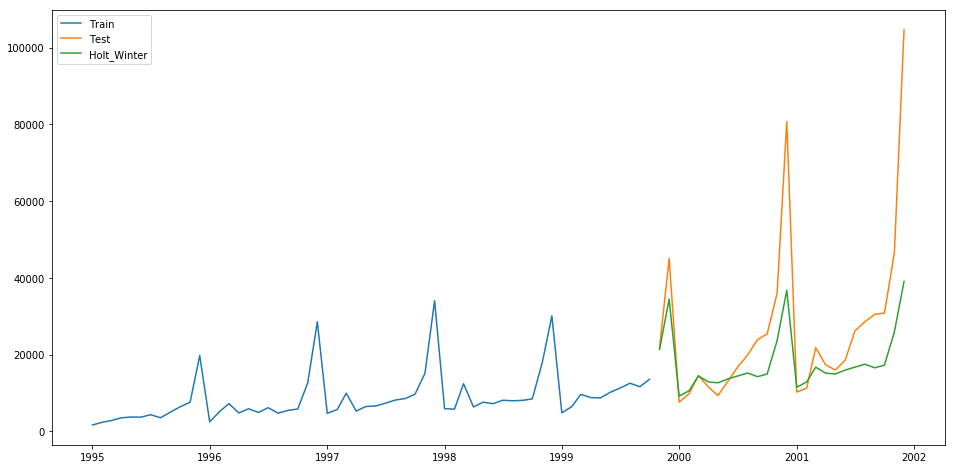

In [143]:
plt.figure(figsize=(16,8))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')

In [144]:
rmse = sqrt(mean_squared_error(test.Sales, y_hat_avg.Holt_Winter))
rmse = round(rmse, 3)
rmse

17323.408

In [145]:
abs_error = np.abs(y_test['Sales']-y_hat_avg.Holt_Winter)
actual = y_test['Sales']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.2569

In [146]:
tempResultsDf = pd.DataFrame({'Method':['Holt Winter forecast - Additive'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

,Method,rmse,MAPE
0,RegressionOnTime,24527.310,0.3980
0,RegressionOnTimeSeasonal,19045.756,0.3136
0,Naive forecast,22752.789,0.6999
0,Simple average forecast,28364.958,0.5273
0,Moving average forecast,22791.892,0.3825
0,SES forecast,25694.036,0.4269
0,Holt,26415.706,0.4343
0,Holt Winter forecast - Additive,17323.408,0.2569


In [147]:
resultsDf.index = [i for i in range(len(resultsDf))]
resultsDf

,Method,rmse,MAPE
0,RegressionOnTime,24527.310,0.3980
1,RegressionOnTimeSeasonal,19045.756,0.3136
2,Naive forecast,22752.789,0.6999
3,Simple average forecast,28364.958,0.5273
4,Moving average forecast,22791.892,0.3825
5,SES forecast,25694.036,0.4269
6,Holt,26415.706,0.4343
7,Holt Winter forecast - Additive,17323.408,0.2569


In [149]:
fit1 = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul').fit()
fit1.params

{'smoothing_level': 0.24961765096311916,
 'smoothing_slope': 0.09351772826105495,
 'smoothing_seasonal': 0.0,
 'damping_slope': nan,
 'initial_level': 3925.870854708659,
 'initial_slope': 203.8162542986393,
 'initial_seasons': array([0.34950759, 0.42552751, 0.72750872, 0.45344948, 0.51016065,
        0.50860837, 0.56837121, 0.57270849, 0.5736553 , 0.64093966,
        1.09187892, 2.2270751 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [150]:
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))

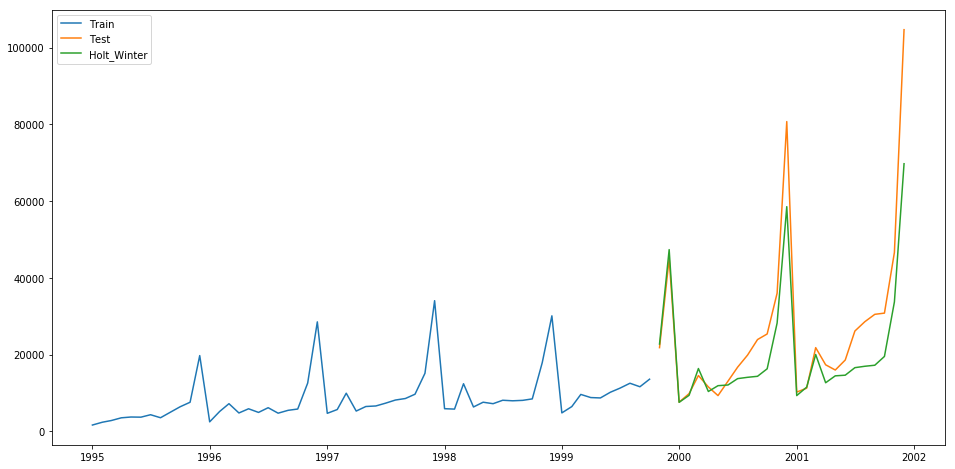

In [151]:
plt.figure(figsize=(16,8))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')

In [152]:
rmse = sqrt(mean_squared_error(test.Sales, y_hat_avg.Holt_Winter))
rmse = round(rmse, 3)
rmse

10276.737

In [153]:
abs_error = np.abs(y_test['Sales']-y_hat_avg.Holt_Winter)
actual = y_test['Sales']
mape = np.round(np.mean(abs_error/actual),4)
mape

0.2075

In [154]:
tempResultsDf = pd.DataFrame({'Method':['Holt Winter forecast - Mult'], 'rmse': [rmse],'MAPE': [mape] })
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'rmse', 'MAPE']]
resultsDf

,Method,rmse,MAPE
0,RegressionOnTime,24527.310,0.3980
1,RegressionOnTimeSeasonal,19045.756,0.3136
2,Naive forecast,22752.789,0.6999
3,Simple average forecast,28364.958,0.5273
4,Moving average forecast,22791.892,0.3825
5,SES forecast,25694.036,0.4269
6,Holt,26415.706,0.4343
7,Holt Winter forecast - Additive,17323.408,0.2569
0,Holt Winter forecast - Mult,10276.737,0.2075
